In [17]:
from importlib import reload
from scipy.stats import boxcox
from dfprepare import norm_data

import LRR
reload(LRR)
from LRR import *

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,0.139660,0.158716,0,10,44,3,0.5,0.340909,1.0,1,1,1
1,0.143329,0.176952,0,10,44,3,0.5,0.340909,1.0,1,1,0
2,0.122027,0.257976,0,10,44,3,0.5,0.340909,1.0,1,1,0
3,0.123928,0.320744,0,10,44,3,0.5,0.340909,1.0,1,0,0
4,0.123964,0.390375,0,10,44,3,0.5,0.340909,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.126667,0.318489,5,21,21,3,0.5,0.318182,1.0,1,0,0
800,0.121337,0.375671,5,21,21,3,0.5,0.318182,1.0,1,1,0
801,0.114176,0.403384,5,21,21,3,0.5,0.318182,1.0,1,1,0
802,0.104319,0.513018,5,21,21,3,0.5,0.318182,1.0,1,1,0


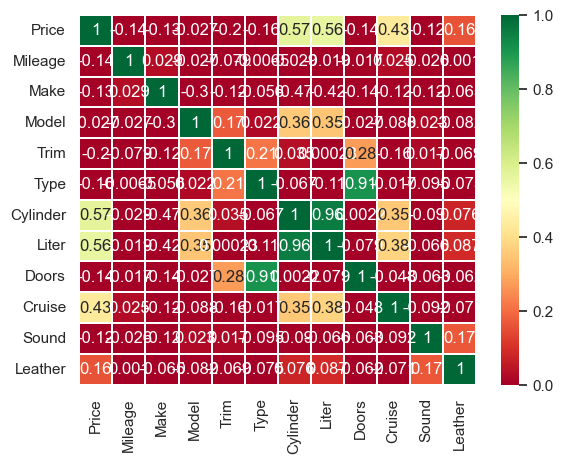

In [18]:
# Read dataframe
data = pd.read_excel('kuiper.xls')
data.dropna(inplace=True)
display(data)

# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

# Dependent variable
explore_column = 'Price' 

### Строим базовую модель

In [19]:
base_research = LinearRegressionResearch(data, column=explore_column)
base_research.info()
new_model, selected_features = base_research.stepwise_selection(criteria='AIC')

                                    Price                                     
Dep. Variable:                  Price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     72.33
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          1.10e-111
Time:                        23:43:13   Log-Likelihood:                 616.99
No. Observations:                 804   AIC:                            -1210.
Df Residuals:                     792   BIC:                            -1154.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1893      0.026      7.289      0.0

,Variable,VIF,Tolerance
0,Mileage,5.764415,0.173478
1,Make,4.480187,0.223205
2,Model,4.913666,0.203514
3,Trim,4.743612,0.210810
4,Type,42.586401,0.023482
5,Cylinder,27.738852,0.036051
6,Liter,37.594367,0.026600
7,Doors,30.978091,0.032281
8,Cruise,4.740424,0.210952
9,Sound,3.132204,0.319264


,Intercept,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.123515,7.589816451189658e-13,792.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.836317,3.251358246307087e-09,792.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.675592,0.0003925548611891339,792.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.424256,1.271893946301003e-07,792.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.515739,9.010449882468064e-07,792.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.144493,0.7039562986281656,792.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,48.564256,6.732120093705762e-12,792.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.084986,0.29790262080089486,792.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.964161,0.3264405754062615,792.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,51.432026,1.7026917991272539e-12,792.0,1.0


,dfb_Intercept,dfb_Mileage,dfb_Make,dfb_Model,dfb_Trim,dfb_Type,dfb_Cylinder,dfb_Liter,dfb_Doors,dfb_Cruise,dfb_Sound,dfb_Leather,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.039337,0.051740,0.064289,0.047192,-0.048393,-0.036718,-0.056960,0.061735,0.039385,-0.024177,-0.022214,-0.020519,0.001647,-1.145798,0.014830,-0.140581,-1.146025,-0.140609
1,-0.042182,0.029312,0.042778,0.039021,-0.027057,-0.024511,-0.036543,0.036181,0.026970,-0.006128,-0.023651,0.046676,0.000801,-0.717436,0.018334,-0.098046,-0.717216,-0.098016
2,-0.041605,0.018520,0.047740,0.043575,-0.031161,-0.027370,-0.041240,0.040721,0.030167,-0.006561,-0.026771,0.052140,0.000936,-0.800836,0.017220,-0.106007,-0.800655,-0.105983
3,-0.063242,0.010280,0.065834,0.044386,-0.036372,-0.022866,-0.035336,0.038650,0.028579,-0.005459,0.041233,0.046330,0.001189,-0.887785,0.017777,-0.119436,-0.887666,-0.119420
4,-0.046058,-0.003831,0.082622,0.043105,-0.054744,-0.027696,-0.045883,0.055524,0.034019,-0.021446,0.069480,-0.035875,0.001840,-1.168870,0.015903,-0.148587,-1.169140,-0.148622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.015629,0.024067,-0.141273,-0.059323,0.035200,0.012276,-0.112971,0.102247,-0.021806,-0.032284,0.027019,0.059321,0.003885,-1.475494,0.020967,-0.215929,-1.476593,-0.216090
800,0.050656,0.002022,-0.139582,-0.045170,0.030504,-0.000223,-0.112871,0.097840,-0.011555,-0.029643,-0.079090,0.067459,0.003305,-1.264057,0.024223,-0.199160,-1.264535,-0.199235
801,0.054790,-0.005792,-0.142638,-0.046140,0.030634,-0.000241,-0.115607,0.100183,-0.011766,-0.030140,-0.081038,0.068974,0.003454,-1.291720,0.024240,-0.203592,-1.292266,-0.203678
802,0.063909,-0.035312,-0.136540,-0.044095,0.027288,-0.000278,-0.111670,0.096659,-0.011103,-0.028277,-0.078394,0.066170,0.003268,-1.236356,0.025015,-0.198036,-1.236769,-0.198102


,student_resid,unadj_p,bonferroni(p)
0,-1.146025,0.252131,1.0
1,-0.717216,0.473453,1.0
2,-0.800655,0.423572,1.0
3,-0.887666,0.374990,1.0
4,-1.169140,0.242699,1.0
...,...,...,...
799,-1.476593,0.140183,1.0
800,-1.264535,0.206411,1.0
801,-1.292266,0.196642,1.0
802,-1.236769,0.216540,1.0


                                STEPS AIC                              
Selected Features: ['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 
AIC: -1209.9803269004008 
Selected Features: ['Mileage', 'Make', 'Model', 'Trim', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 
AIC: -1211.8336577695748 
Selected Features: ['Mileage', 'Make', 'Model', 'Trim', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'] 
AIC: -1212.5075915952377 


### Проведём исследование улучшенной модели с помощью (AIC/BIC)

                                    Price                                     
Dep. Variable:                  Price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     88.30
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          2.54e-113
Time:                        23:43:15   Log-Likelihood:                 616.25
No. Observations:                 804   AIC:                            -1213.
Df Residuals:                     794   BIC:                            -1166.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1826      0.025      7.212      0.0

,Variable,VIF,Tolerance
0,Mileage,5.684898,0.175905
1,Make,4.023498,0.248540
2,Model,4.343273,0.230241
3,Trim,4.720745,0.211831
4,Cylinder,3.097732,0.322817
5,Doors,4.166586,0.240005
6,Cruise,4.307424,0.232157
7,Sound,3.055368,0.327293
8,Leather,3.486773,0.286798


,Intercept,Mileage,Make,Model,Trim,Cylinder,Doors,Cruise,Sound,Leather,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.013615,1.286738280056881e-12,794.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.221339,2.6886835536243156e-09,794.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.821679,0.0006159452610342102,794.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.410245,1.7568321125070104e-08,794.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.207338,1.0519224837407828e-06,794.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,325.021837,3.621294397563109e-61,794.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.681197,0.0019282642916923606,794.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.464884,2.6998412164629462e-12,794.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.677517,0.017418035321063487,794.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.764569,1.0005774683503076e-05,794.0,1.0


,dfb_Intercept,dfb_Mileage,dfb_Make,dfb_Model,dfb_Trim,dfb_Cylinder,dfb_Doors,dfb_Cruise,dfb_Sound,dfb_Leather,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.033114,0.051047,0.064297,0.040815,-0.044315,0.008204,0.001188,-0.021150,-0.013695,-0.017950,0.001413,-1.101232,0.011517,-0.118867,-1.101380,-0.118883
1,-0.038097,0.028492,0.041605,0.033892,-0.024066,-0.003538,0.003600,-0.004950,-0.017777,0.045082,0.000714,-0.678829,0.015253,-0.084483,-0.678598,-0.084454
2,-0.037349,0.018487,0.046702,0.038060,-0.027920,-0.004367,0.004091,-0.005237,-0.020275,0.050631,0.000829,-0.761637,0.014098,-0.091076,-0.761435,-0.091052
3,-0.058657,0.010731,0.065065,0.040310,-0.033589,0.006036,0.010595,-0.003736,0.044743,0.045603,0.001153,-0.852226,0.015624,-0.107367,-0.852079,-0.107348
4,-0.039592,-0.002416,0.082880,0.038919,-0.051344,0.021612,0.009331,-0.017887,0.074056,-0.032824,0.001736,-1.127059,0.013482,-0.131758,-1.127251,-0.131781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.035283,0.025054,-0.121830,-0.048523,0.030353,-0.054437,-0.049747,-0.014610,0.031957,0.060944,0.003076,-1.386253,0.015757,-0.175399,-1.387059,-0.175501
800,0.065227,0.004182,-0.120414,-0.037705,0.026719,-0.061950,-0.050193,-0.014559,-0.066564,0.066951,0.002530,-1.170539,0.018132,-0.159067,-1.170812,-0.159104
801,0.069654,-0.002981,-0.123212,-0.038561,0.026842,-0.063618,-0.051341,-0.014731,-0.068308,0.068561,0.002649,-1.197940,0.018125,-0.162761,-1.198269,-0.162806
802,0.077348,-0.030237,-0.117392,-0.036662,0.023699,-0.061474,-0.048845,-0.013407,-0.065824,0.065530,0.002500,-1.141962,0.018807,-0.158101,-1.142181,-0.158131


,student_resid,unadj_p,bonferroni(p)
0,-1.101380,0.271066,1.0
1,-0.678598,0.497591,1.0
2,-0.761435,0.446624,1.0
3,-0.852079,0.394428,1.0
4,-1.127251,0.259977,1.0
...,...,...,...
799,-1.387059,0.165813,1.0
800,-1.170812,0.242026,1.0
801,-1.198269,0.231170,1.0
802,-1.142181,0.253723,1.0


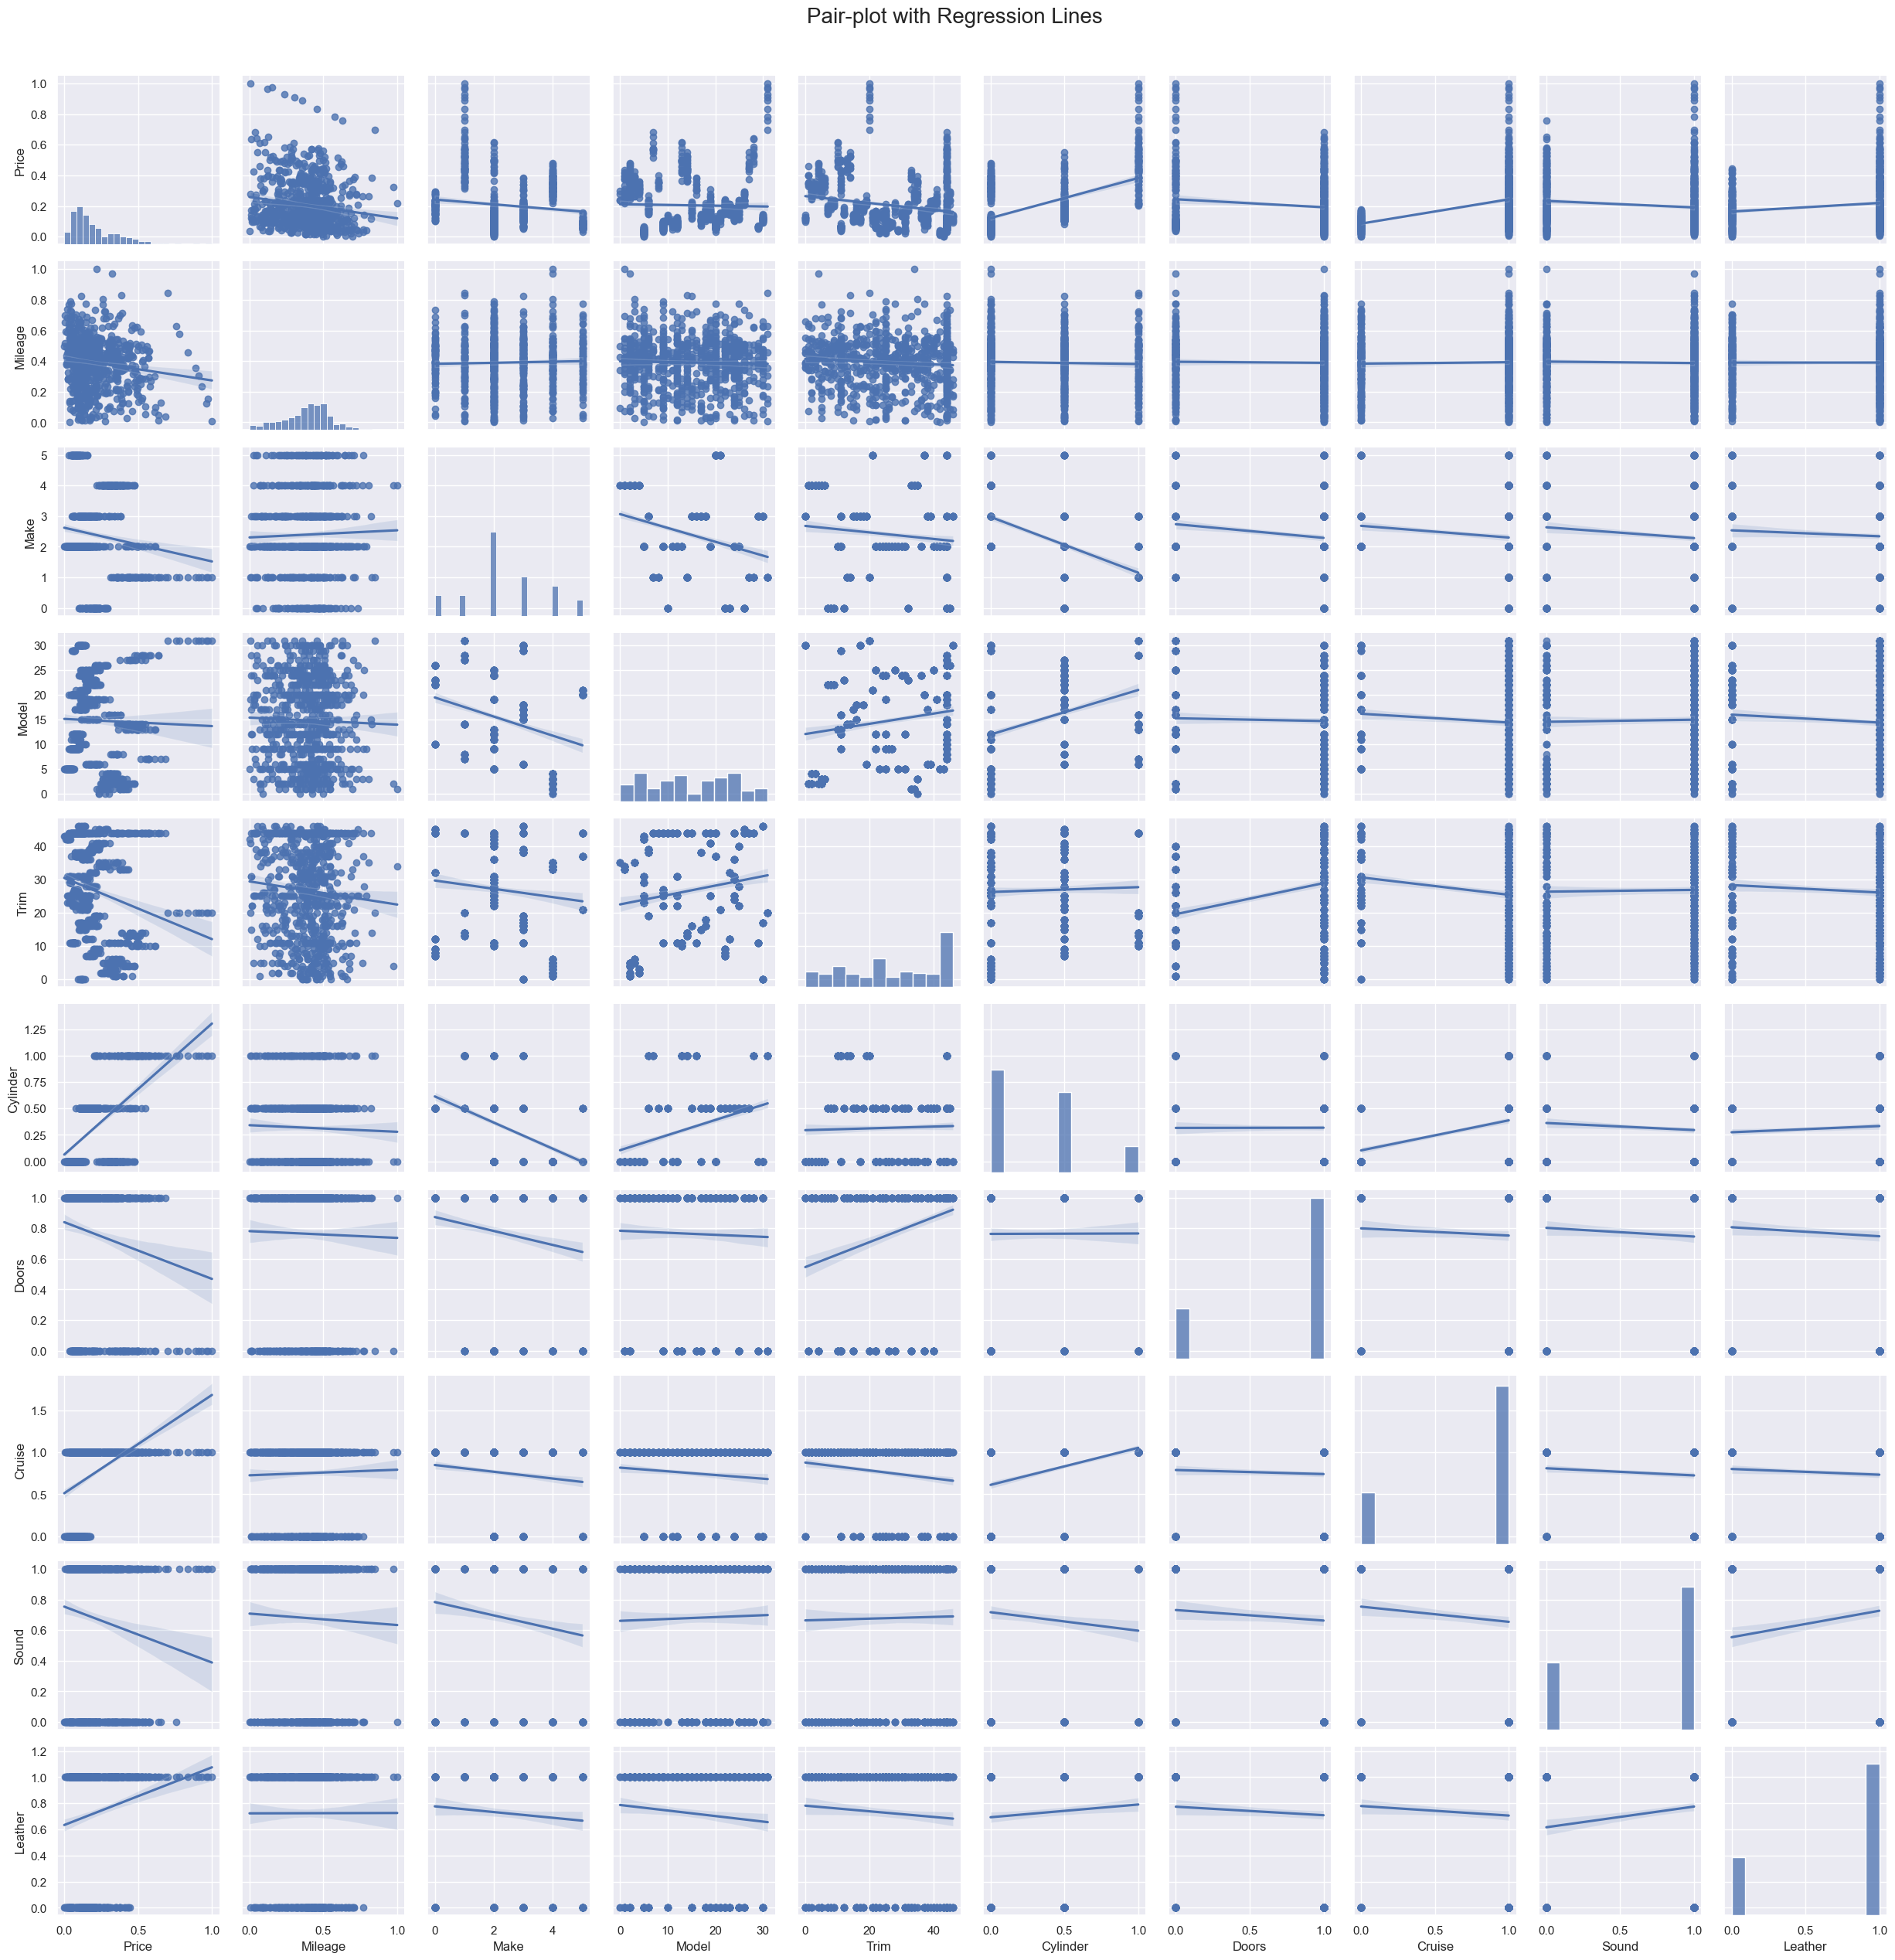

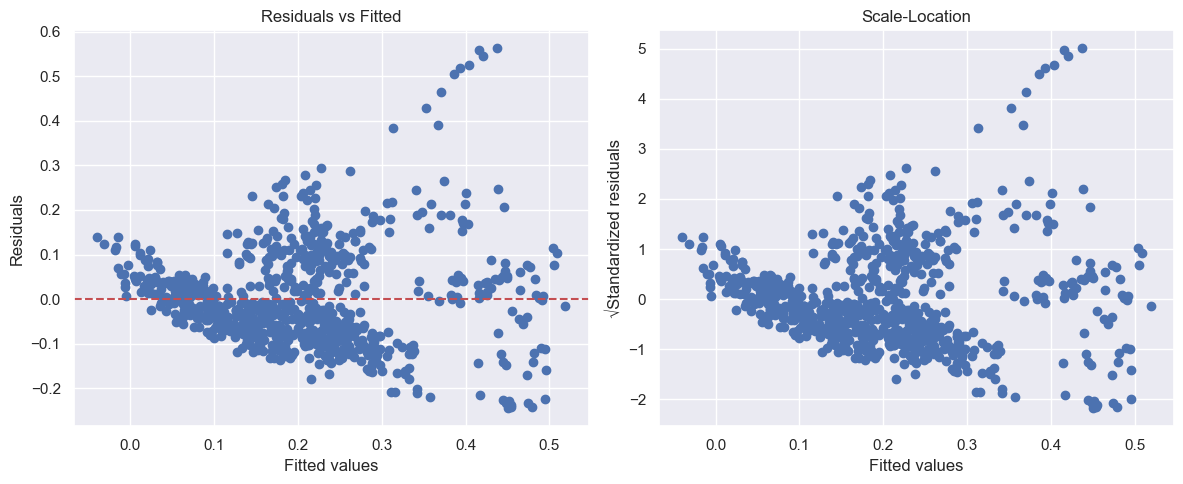

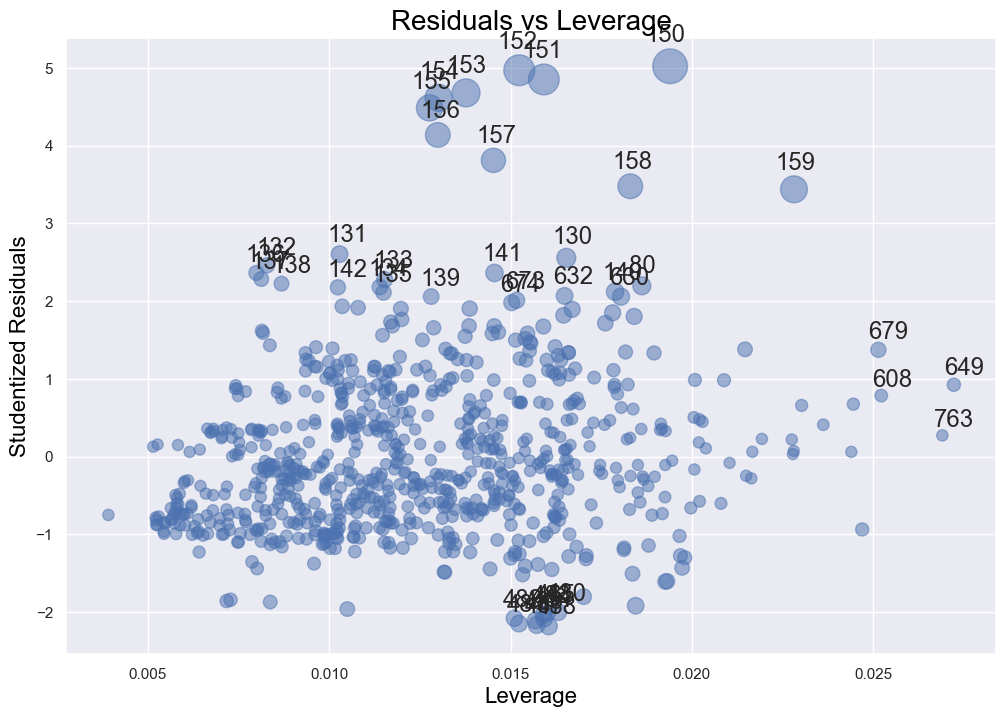

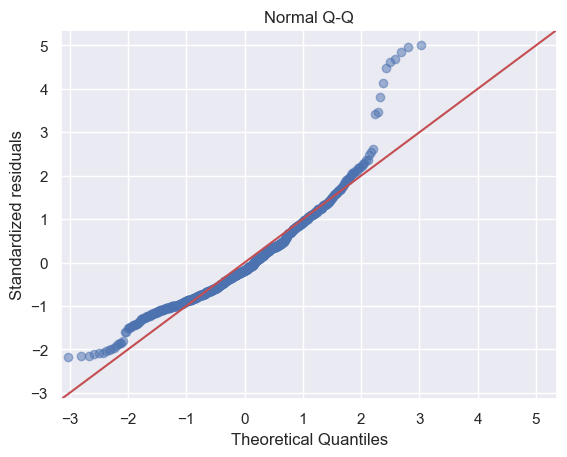

In [20]:
new_data = data[[explore_column] + selected_features]
enhanced_research = LinearRegressionResearch(new_data, column=explore_column)
enhanced_research.info()
enhanced_research.draw_plots()

### Попытаемся улучшить уже улучшенную модель при помощи (Box-Cox)

                                   Price_t                                    
Dep. Variable:                Price_t   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     110.4
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          1.79e-133
Time:                        23:43:37   Log-Likelihood:                -253.97
No. Observations:                 804   AIC:                             527.9
Df Residuals:                     794   BIC:                             574.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7192      0.075    -23.001      0.0

,Variable,VIF,Tolerance
0,Mileage,5.684898,0.175905
1,Make,4.023498,0.248540
2,Model,4.343273,0.230241
3,Trim,4.720745,0.211831
4,Cylinder,3.097732,0.322817
5,Doors,4.166586,0.240005
6,Cruise,4.307424,0.232157
7,Sound,3.055368,0.327293
8,Leather,3.486773,0.286798


,Intercept,Mileage,Make,Model,Trim,Cylinder,Doors,Cruise,Sound,Leather,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.023416,4.135747496669283e-90,794.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.475334,6.403522650756668e-13,794.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.948657,4.3441391884484087e-10,794.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.254126,0.00417439705478036,794.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,56.287297,1.6797635400991372e-13,794.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,357.165896,4.589968316441863e-66,794.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.003632,0.9519607964132888,794.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,113.534211,7.188727001793448e-25,794.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.297216,0.13000410922016017,794.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.264837,2.155655329445005e-05,794.0,1.0


,dfb_Intercept,dfb_Mileage,dfb_Make,dfb_Model,dfb_Trim,dfb_Cylinder,dfb_Doors,dfb_Cruise,dfb_Sound,dfb_Leather,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.020414,0.031469,0.039638,0.025161,-0.027319,0.005058,0.000733,-0.013039,-0.008443,-0.011066,0.000537,-0.679207,0.011517,-0.073314,-0.678976,-0.073289
1,-0.014080,0.010530,0.015377,0.012527,-0.008895,-0.001308,0.001331,-0.001829,-0.006570,0.016662,0.000098,-0.250956,0.015253,-0.031232,-0.250808,-0.031214
2,-0.019936,0.009868,0.024929,0.020316,-0.014903,-0.002331,0.002184,-0.002795,-0.010822,0.027026,0.000236,-0.406653,0.014098,-0.048627,-0.406439,-0.048602
3,-0.027544,0.005039,0.030553,0.018929,-0.015773,0.002834,0.004975,-0.001754,0.021010,0.021414,0.000254,-0.400327,0.015624,-0.050435,-0.400115,-0.050408
4,-0.022526,-0.001375,0.047154,0.022143,-0.029212,0.012296,0.005309,-0.010177,0.042134,-0.018675,0.000563,-0.641584,0.013482,-0.075004,-0.641346,-0.074976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.042866,0.030438,-0.148013,-0.058952,0.036876,-0.066136,-0.060439,-0.017750,0.038826,0.074042,0.004536,-1.683209,0.015757,-0.212973,-1.685158,-0.213219
800,0.086328,0.005535,-0.159368,-0.049903,0.035362,-0.081991,-0.066430,-0.019269,-0.088098,0.088609,0.004426,-1.548207,0.018132,-0.210389,-1.549572,-0.210575
801,0.093603,-0.004007,-0.165576,-0.051819,0.036071,-0.085491,-0.068993,-0.019796,-0.091794,0.092134,0.004777,-1.608648,0.018125,-0.218563,-1.610261,-0.218782
802,0.107526,-0.042034,-0.163195,-0.050967,0.032945,-0.085459,-0.067902,-0.018639,-0.091506,0.091097,0.004823,-1.586301,0.018807,-0.219618,-1.587820,-0.219828


,student_resid,unadj_p,bonferroni(p)
0,-0.678976,0.497351,1.0
1,-0.250808,0.802028,1.0
2,-0.406439,0.684530,1.0
3,-0.400115,0.689179,1.0
4,-0.641346,0.521483,1.0
...,...,...,...
799,-1.685158,0.092352,1.0
800,-1.549572,0.121643,1.0
801,-1.610261,0.107739,1.0
802,-1.587820,0.112726,1.0


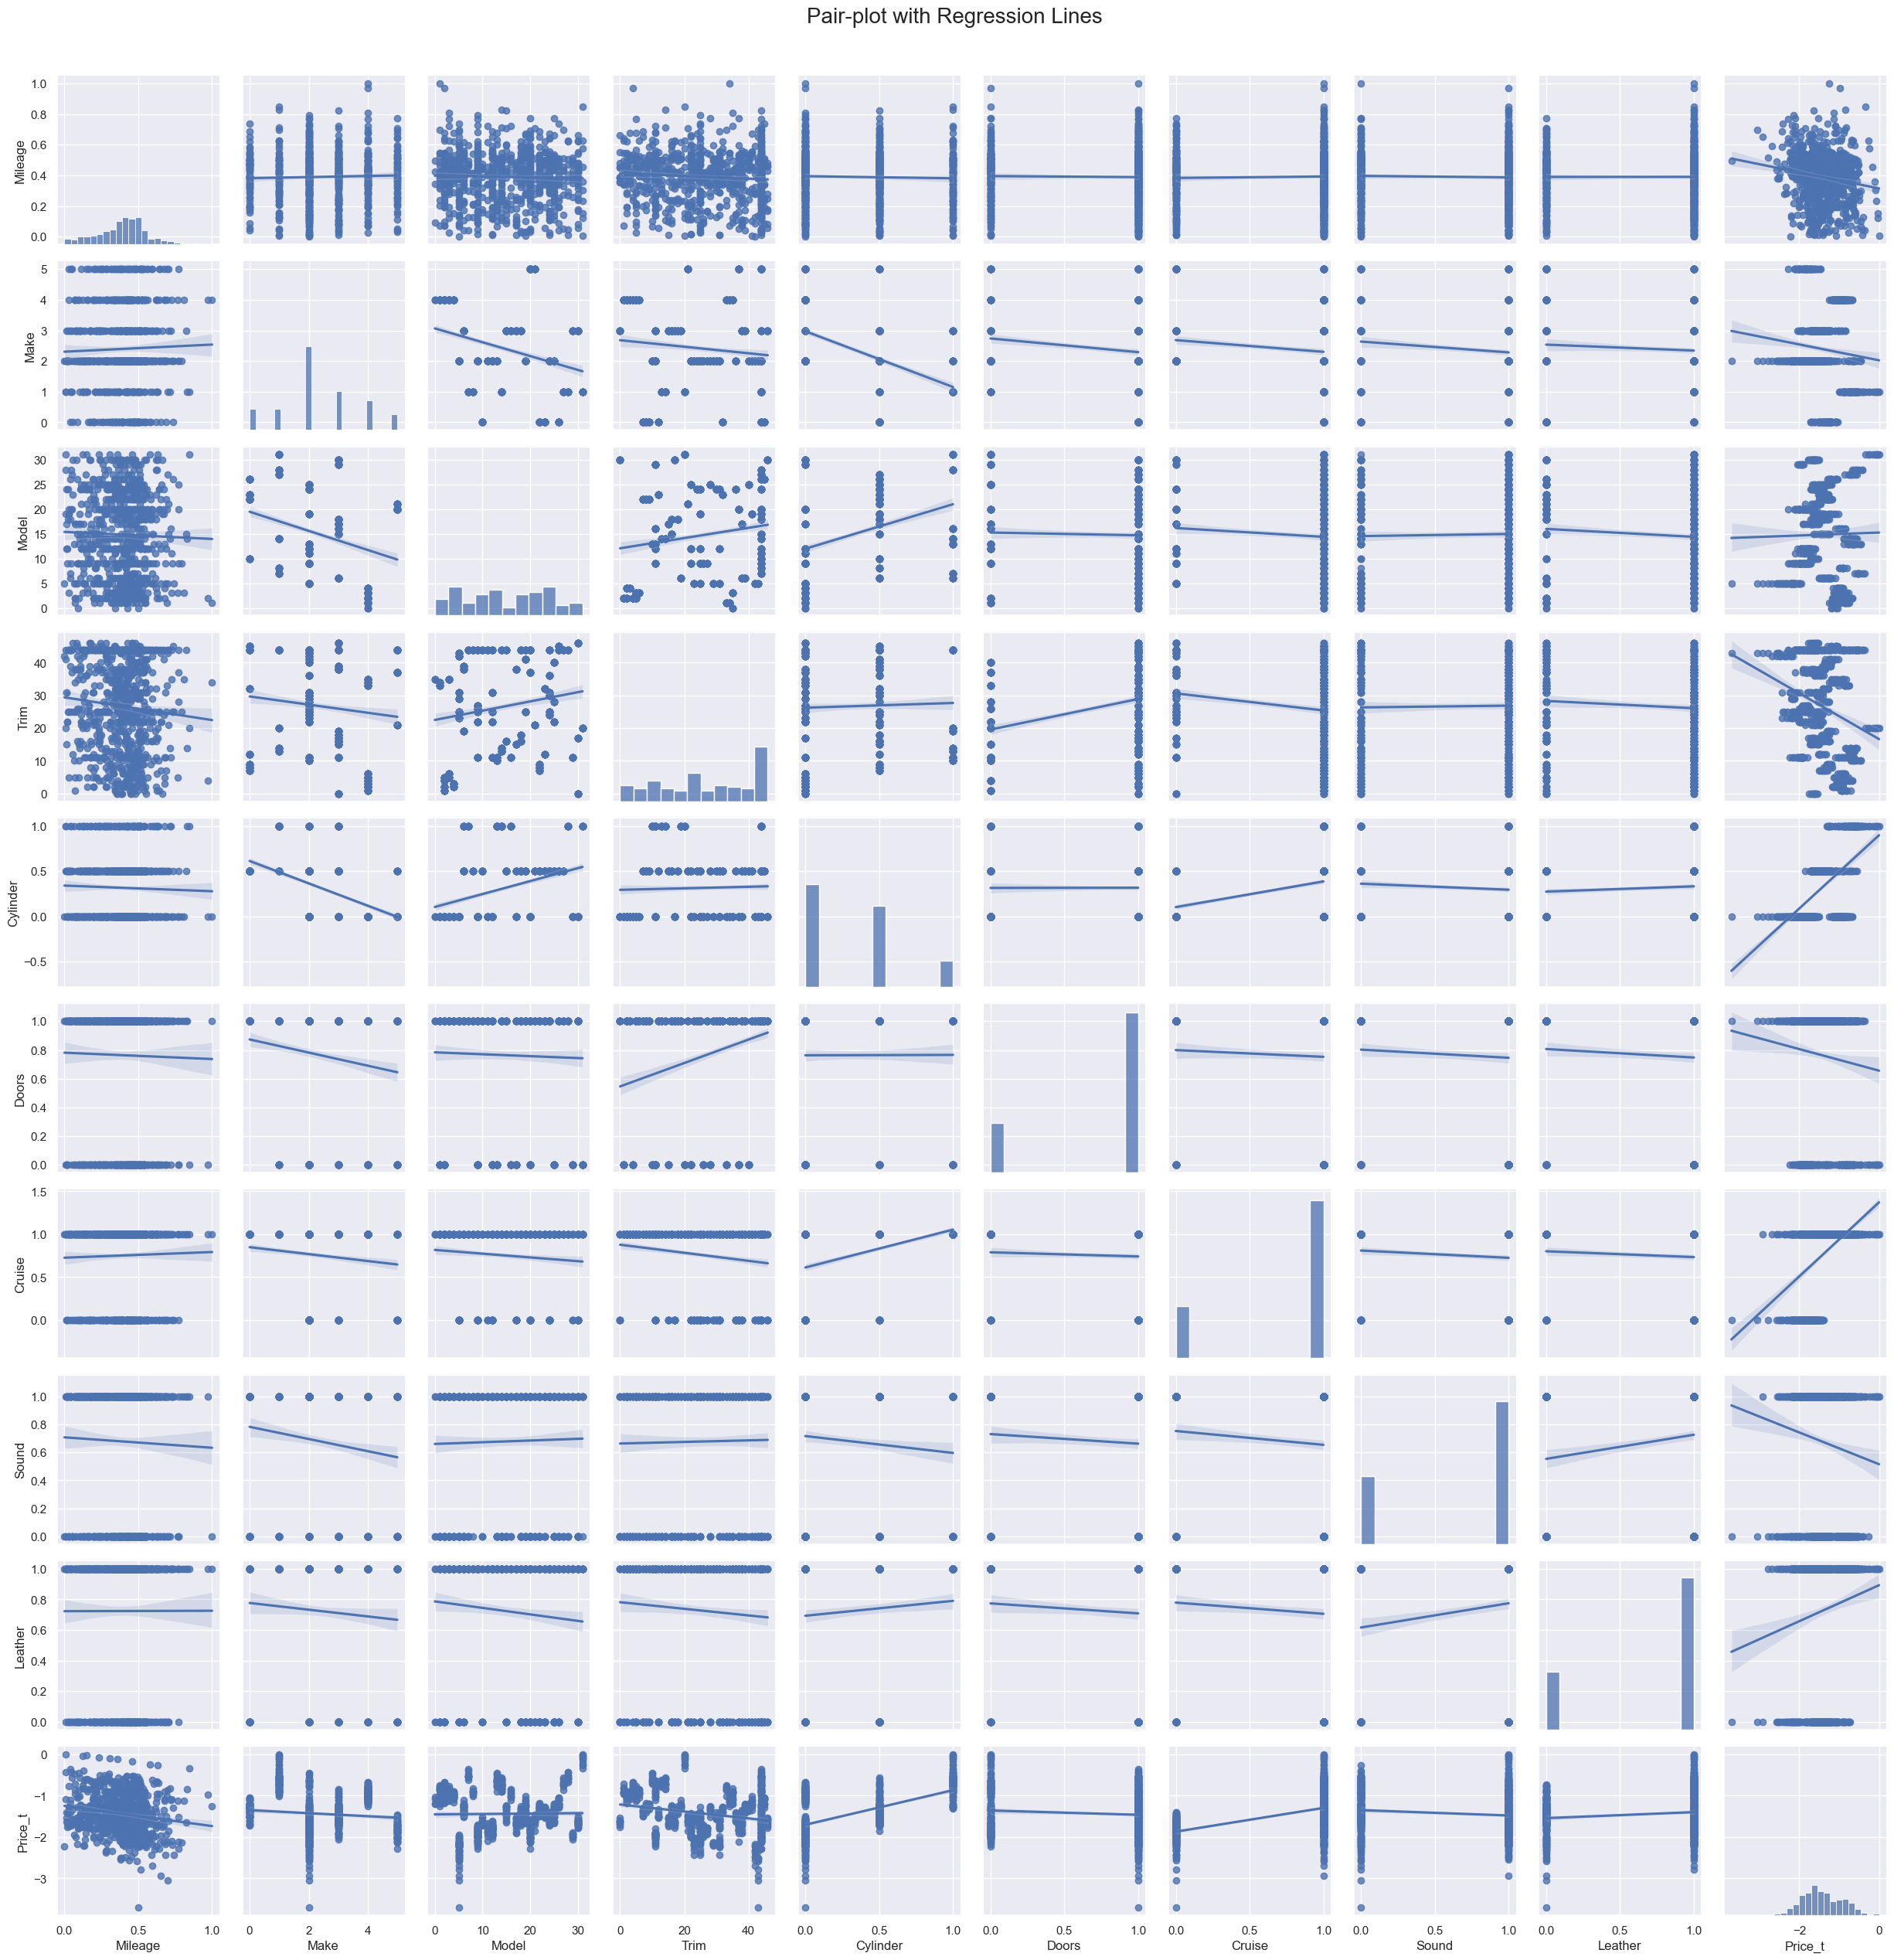

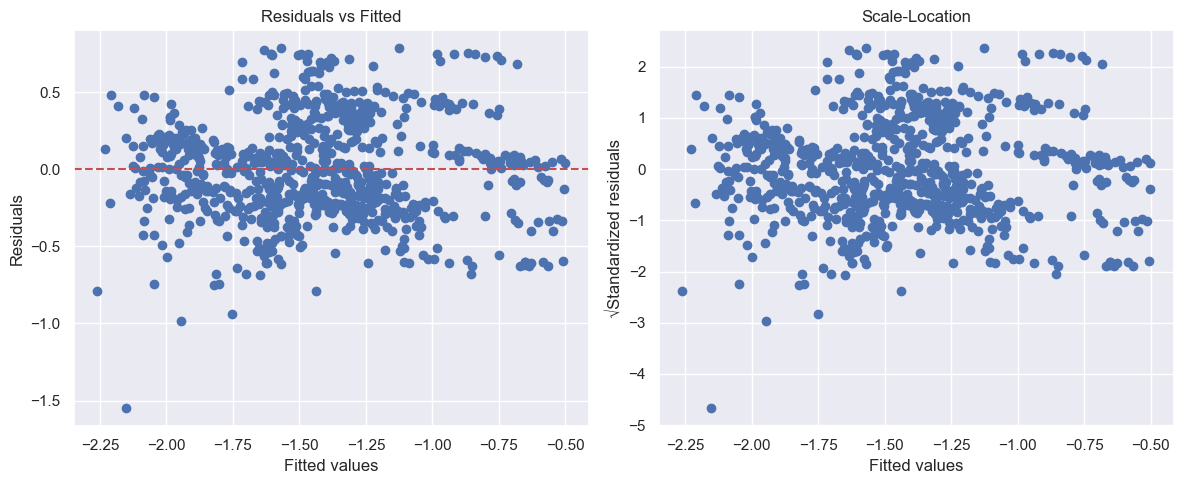

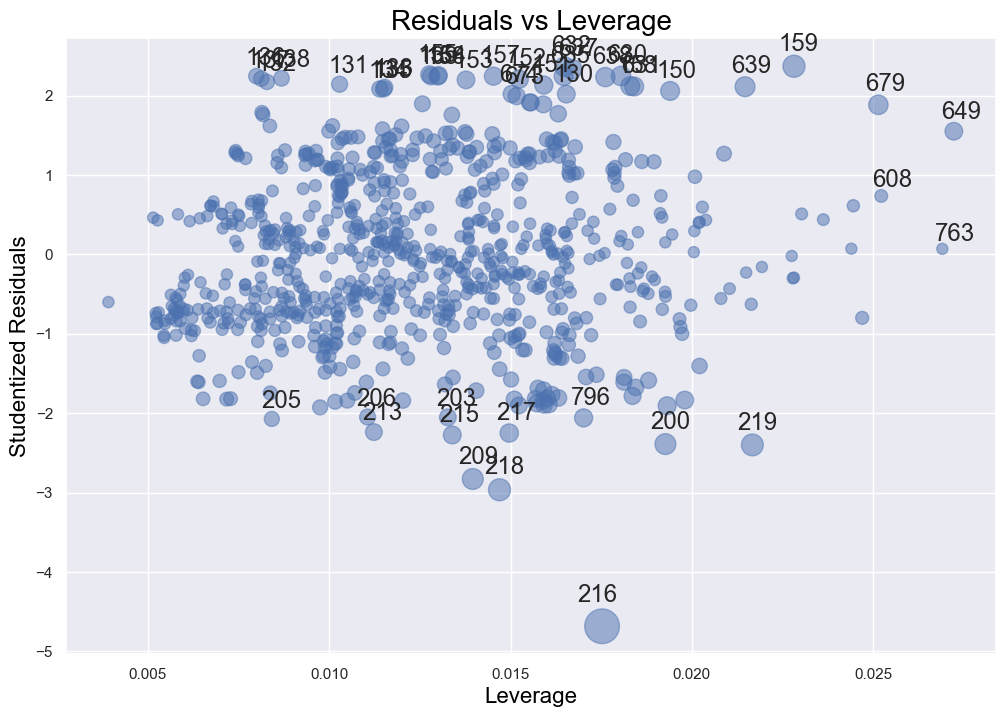

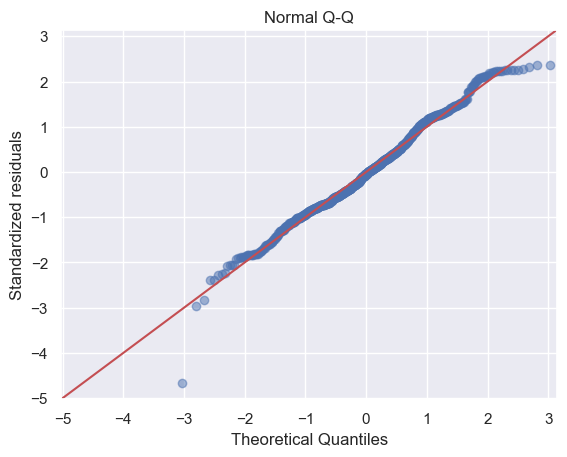

In [21]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1e-6)  # + 1 чтобы не было 0-значений

new_data = data[selected_features].copy()
new_explore_column = explore_column + '_t'
new_data[new_explore_column] = y_transformed

# Проводим анализ заново
enhanced_research = LinearRegressionResearch(new_data, column=new_explore_column)
enhanced_research.info()
enhanced_research.draw_plots()